# How to Choose the Number of Clusters

Using the same code as in the previous exercise, find the WCSS for clustering solutions with 1 to 10 clusters (you can try with more if you wish).

Find the most suitable solutions, run them and compare the results.

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Countries_exercise.csv'</i>.

In [5]:
data = pd.read_csv('Countries-exercise.csv')
data.head()

name  Longitude   Latitude
0        Aruba -69.982677  12.520880
1  Afghanistan  66.004734  33.835231
2       Angola  17.537368 -12.293361
3     Anguilla -63.064989  18.223959
4      Albania  20.049834  41.142450

Remove the duplicate index column from the dataset. 

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

## Plot the data

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

In [6]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()


## Select the features

Make sure to select the appropriate features since we are no longer using the categorical variable for our clustering but rather <i>'Longitude'</i> and <i>'Laditude'</i>.

In [8]:
x = data.iloc[:,1:3]
x.head()

Longitude   Latitude
0 -69.982677  12.520880
1  66.004734  33.835231
2  17.537368 -12.293361
3 -63.064989  18.223959
4  20.049834  41.142450

## Clustering

Use 4 clusters initially.

In [10]:
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Clustering results

In [12]:
cluster_result = kmeans.fit_predict(x)
cluster_result

array([1, 0, 0, 1, 3, 3, 3, 0, 1, 0, 1, 0, 2, 0, 1, 2, 3, 0, 0, 3, 3, 3,
       2, 3, 0, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 2, 2, 0, 0, 3, 1, 2, 3, 0,
       0, 0, 1, 1, 0, 3, 1, 1, 1, 1, 3, 3, 3, 3, 0, 1, 3, 1, 3, 1, 0, 0,
       3, 3, 0, 3, 2, 1, 3, 3, 2, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 1, 3, 1,
       2, 1, 2, 0, 1, 3, 1, 3, 2, 3, 0, 2, 0, 3, 0, 0, 3, 0, 3, 1, 3, 0,
       2, 0, 0, 0, 0, 2, 1, 1, 2, 3, 0, 2, 0, 3, 3, 1, 3, 0, 0, 3, 3, 3,
       2, 1, 3, 3, 3, 0, 0, 1, 2, 3, 3, 3, 2, 3, 2, 2, 0, 3, 1, 0, 0, 2,
       0, 2, 3, 2, 3, 1, 1, 3, 3, 0, 2, 2, 0, 0, 1, 1, 1, 2, 2, 2, 3, 1,
       2, 3, 1, 0, 1, 0, 3, 2, 0, 3, 0, 0, 0, 3, 2, 1, 3, 2, 3, 1, 3, 0,
       0, 1, 3, 0, 1, 3, 3, 3, 0, 1, 0, 0, 1, 0, 3, 2, 0, 0, 2, 1, 1, 3,
       3, 2, 0, 0, 3, 1, 1, 0, 3, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0])

In [13]:
data['Cluster'] = cluster_result
data.head()

name  Longitude   Latitude  Cluster
0        Aruba -69.982677  12.520880        1
1  Afghanistan  66.004734  33.835231        0
2       Angola  17.537368 -12.293361        0
3     Anguilla -63.064989  18.223959        1
4      Albania  20.049834  41.142450        3

Plot the data once again but separate the data by the clusters we defined.  

## Plot the data

In [14]:
plt.scatter(data['Longitude'],data['Latitude'],c=data['Cluster'], cmap="rainbow")
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Selecting the number of clusters

### WCSS

Use the ingerated <i>sklearn</i> method <i> 'inertia_' </i>.

In [16]:
kmeans.inertia_

256573.08675934302

Write a loop that calculates and saves the WCSS for any number of clusters from 1 up to 10 (or more if you wish).

In [18]:
wcss = []
col_num = 10
for i in range(1,col_num):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_inter = kmeans.inertia_
    wcss.append(wcss_inter)
    

In [19]:
wcss

[1413859.6798344273,
 657012.0797586325,
 325235.52237055893,
 256590.58575406106,
 192194.9829002524,
 152164.15221066383,
 127549.31394168368,
 102873.2526445741,
 84967.41720068289]

### The Elbow Method

In [26]:
number_clusters = range(1,col_num)
plt.plot(number_clusters,wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("The Elbow Method")
plt.show()

Based on the Elbow Curve, plot several graphs with the appropriate amounts of clusters you believe would best fit the data.

Compare the scatter plots to determine which one to use in our further analysis. 

<i>Hint: we already created the scatter plot for 4 clusters, so we only have to slightly alter our code.</i>

In [72]:
kmeans = KMeans(4)

In [73]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [74]:
cluster_results = kmeans.fit_predict(x)
cluster_results

array([0, 3, 3, 0, 2, 2, 2, 3, 0, 2, 0, 3, 1, 3, 0, 1, 2, 2, 3, 2, 2, 2,
       1, 2, 3, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1, 3, 3, 2, 0, 1, 2, 3,
       3, 3, 0, 0, 3, 2, 0, 0, 0, 0, 2, 2, 2, 2, 3, 0, 2, 0, 2, 0, 2, 3,
       2, 2, 3, 2, 1, 0, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 0, 2, 0,
       1, 0, 1, 3, 0, 2, 0, 2, 1, 2, 3, 1, 3, 2, 3, 3, 2, 2, 2, 0, 2, 2,
       1, 3, 3, 3, 3, 1, 0, 0, 1, 2, 3, 1, 2, 2, 2, 0, 2, 3, 3, 2, 2, 2,
       1, 0, 2, 2, 2, 3, 3, 0, 1, 2, 2, 2, 1, 2, 1, 1, 3, 2, 0, 3, 3, 1,
       3, 1, 2, 1, 2, 0, 0, 2, 2, 1, 1, 1, 3, 3, 0, 0, 0, 1, 1, 1, 2, 0,
       1, 2, 0, 2, 0, 3, 2, 1, 3, 2, 3, 3, 3, 2, 1, 0, 3, 1, 2, 0, 2, 3,
       3, 0, 2, 3, 0, 2, 2, 2, 3, 0, 3, 2, 0, 2, 2, 1, 3, 3, 1, 0, 0, 2,
       2, 1, 3, 3, 2, 0, 0, 3, 2, 0, 0, 0, 0, 1, 1, 0, 0, 3, 3, 3, 3])

In [75]:
data['Cluster'] = cluster_results
data.head()

name  Longitude   Latitude  Cluster
0        Aruba -69.982677  12.520880        0
1  Afghanistan  66.004734  33.835231        3
2       Angola  17.537368 -12.293361        3
3     Anguilla -63.064989  18.223959        0
4      Albania  20.049834  41.142450        2

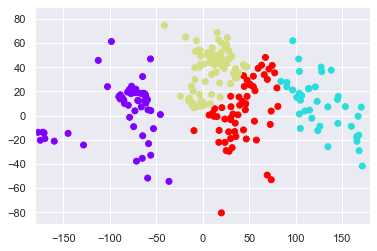

In [76]:
plt.scatter(data['Longitude'],data['Latitude'],c=data['Cluster'], cmap="rainbow")
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()